### Problem

Consider the experiment of tossing a coin until you get two consecutive heads. What is the probability distribution of the number of tosses?
(Just to be clear, the sequence $HH$ requires two tosses and $HTTHH$ requires five tosses.)

### Solution

First, we count the number of ways we can obtain our *first* run of two heads at the $n$th toss, a quantity we denote $C_n$.  Once we find this number, it is just a matter of diving by $2^n$ to obtain the probability.

Note that for small $n$, $C_n$ is easy to calculate.  For example,
\begin{align}
C_n &= 0, \quad n<2,\\
C_2 &= C_3 = 1, \quad HH \text{ and } THH,\\
C_4 &= 2, \quad HTHH \text { and } TTHH.
\end{align}

For larger $n$, note that $C_n$ satisfies the following recursion relation:
\begin{equation}
C_n = 2^{n-3}-\sum_{i=2}^{n-3}2^{n-3-i}C_i, \quad n\geq 5.
\end{equation}

To see this, observe that if we obtain our first run of two heads at the $n$th toss, then our sequence of coin tosses must be of the following form:
\begin{equation}
\underbrace{*\dots*}_{\text{first $n-3$ tosses}}THH.
\end{equation}

Note that a $T$ must precede the final $HH$ because otherwise our first run of two heads would have occured at the $n-1$th toss.

It remains to understand in detail how the first $n-3$ tosses may look.  Of the $2^{n-3}$ possible sequences, we need to remove those where an $HH$ occured.  We can do this by removing those for which the first $HH$ occured at the 2nd toss, then removing those for which the first $HH$ occurred at the 3rd toss, and so forth until we get to toss $n-3$.  But this is precisely the recursion relation we are after:
\begin{equation}
C_n = 2^{n-3}-\sum_{i=2}^{n-3}2^{n-3-i}C_i, \quad n\geq 5.
\end{equation}

We can rewrite this equation in a simpler form observaing the relationship between $2C_n$ and $C_{n+1}$.  First, note that 
\begin{align}
2C_n = 2^{n+1-3}-\sum_{i=2}^{n-3}2^{n+1-3-i}C_i\Rightarrow\\
2C_n + \sum_{i=2}^{n-3}2^{n+1-3-i}C_i = 2^{n+1-3},
\end{align}
and
\begin{align}
C_{n+1} = 2^{n+1-3} - \sum_{i=2}^{n+1-3}2^{n+1-3-i}C_i\Rightarrow\\
C_{n+1} + \sum_{i=2}^{n+1-3}2^{n+1-3-i}C_i = 2^{n+1-3}.
\end{align}

Hence, we obtain the equality
\begin{equation}
C_{n+1} + \sum_{i=2}^{n+1-3}2^{n+1-3-i}C_i = 2C_n + \sum_{i=2}^{n-3}2^{n+1-3-i}C_i\Rightarrow\\
C_{n+1} = 2C_n - C_{n-2}.
\end{equation}

This is just a linear, homogeneous, third-degree recursion equation with constant coefficients,  which we can readily solve (see e.g. [https://math.berkeley.edu/~arash/55/8_2.pdf](https://math.berkeley.edu/~arash/55/8_2.pdf)).  The solution is given by
\begin{equation}
C_n = \left(\frac{5+\sqrt{5}}{10}\right)\left(\frac{1}{2}-\frac{\sqrt{5}}{2}\right)^n+\left(\frac{5-\sqrt{5}}{10}\right)\left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^n, \quad n\geq 5.
\end{equation}

Finally, dividing by $2^n$ we obtain the probability $p_n$ that the first $HH$ occurs at the $n$th toss:
\begin{gather}
p_2=\frac{1}{4}, \quad p_3=\frac{1}{8}, \quad p_4=\frac{2}{16},\\
p_n=\frac{1}{2^n}\left[\left(\frac{5+\sqrt{5}}{10}\right)\left(\frac{1}{2}-\frac{\sqrt{5}}{2}\right)^n+\left(\frac{5-\sqrt{5}}{10}\right)\left(\frac{1}{2}+\frac{\sqrt{5}}{2}\right)^n\right], \quad n\geq 5.\square
\end{gather}

### Code

In [1]:
# returns list of possible sequence of coin tosses of length n.
#
# NOTE: TAKES UP A LOT OF MEMORY BECAUSE IT RETURNS ENTIRE LIST
#
def possible_coin_tosses(n=1):
    coin_toss_possibilities = []
    for bin_seq in [(n-len(bin(i)[2:]))*'0'+bin(i)[2:] for i in range(2**n)]:
        coin_toss_seq = ''
        for bit in bin_seq:
            if bit == '0':
                coin_toss_seq = coin_toss_seq + 'H'
            elif bit == '1':
                coin_toss_seq = coin_toss_seq + 'T'
        coin_toss_possibilities.append(coin_toss_seq)
    return coin_toss_possibilities
l = possible_coin_tosses(n=6)

In [2]:
from collections import defaultdict
import random
from math import sqrt

In [3]:
# choose size
N = 10
l = possible_coin_tosses(n=N)
num_experiments = int(1e04)
# theoretical probabilities
p = {2:1/4, 3:1/8, 4:2/16}
for m in range(5,N+1):
    p[m] = (1/2)**m * ((5+sqrt(5))/10*(1/2-sqrt(5)/2)**m + (5-sqrt(5))/10*(1/2+sqrt(5)/2)**m)
# store empirical results
counter = {i:0 for i in range(1,N+1)}
for experiment in range(num_experiments):
    seq = random.choice(l)
    counter[seq.find('HH')+2]+=1
# convert to empirical probabilities
counter = {key:round(value/num_experiments,6) for key,value in counter.items()}  
# get rid of times when HH didn't happen
counter.pop(1, None)
print(counter)
print(p)

{2: 0.2511, 3: 0.1204, 4: 0.1244, 5: 0.0894, 6: 0.0759, 7: 0.0671, 8: 0.0536, 9: 0.0406, 10: 0.0359}
{2: 0.25, 3: 0.125, 4: 0.125, 5: 0.09375000000000001, 6: 0.078125, 7: 0.06250000000000001, 8: 0.050781250000000014, 9: 0.04101562500000001, 10: 0.033203125000000014}


In [4]:
from matplotlib import pyplot as plt

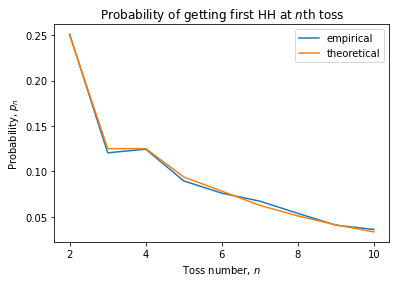

In [5]:
plt.clf()

# x axis
plt.xticks(range(2,N+1,2))
plt.xlabel("Toss number, "+r"$n$")

# y axis
plt.ylabel("Probability, "+r"$p_n$")

# plot data
plt.plot(counter.keys(), counter.values(), label='empirical')
plt.plot(p.keys(), p.values(), label='theoretical')

# title
plt.title("Probability of getting first HH at " + r"$n$"+"th"+" toss")

#legend
plt.legend()
plt.show()